# Decomposing Time Series

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = sns.load_dataset('flights')

In [3]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


create date column with type string

In [6]:
dates = df['year'].astype(str) + ' ' + df['month'].astype(str)

format column to datatime and set it as the index of the df

In [23]:
dates.name = 'month in year'

In [24]:
df.set_index(pd.to_datetime(dates), inplace=True)

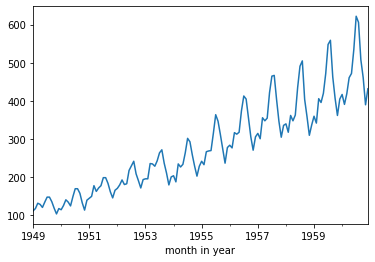

In [25]:
df['passengers'].plot()

it is possible to zoom in via df.loc

the x-axis of the plot is self-adjusting

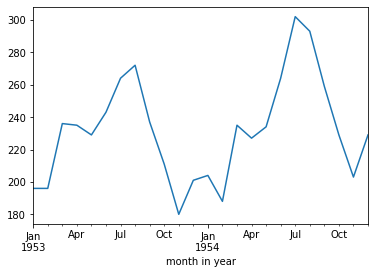

In [26]:
df.loc['1953-01-01':'1954-12-31', 'passengers'].plot()

### Decomposition:
y = trend + variance change + seasonality + X + noise 

*decomposition can be done using the human eye*

*the X + noise (more complicated patterns) can probability recognized by a machine learning algorithms*

i do not want the model to predict the trend or the seasonality because it is already visible (e.g. if i want to predict the weather)

### Differential: Trend

In [30]:
df['diff'] = df['passengers'].diff() # differential
# just the difference between the previous and the current count

In [32]:
df['diff'].mean()

2.237762237762238

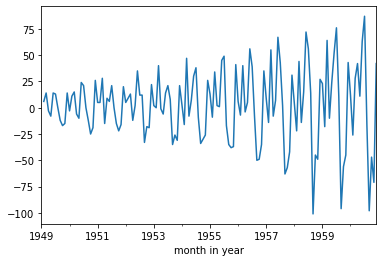

In [31]:
df['diff'].plot()

#### Percentage change
removes trend and variance change

In [33]:
df['pct'] = df['passengers'].pct_change()

In [37]:
df['pct'].mean()
# every month, the passenger number grows by that many % (*100)

0.0151685356581768

In [34]:
df.head()

,year,month,passengers,diff,pct
month in year,,,,,
1949-01-01,1949,January,112,NaN,NaN
1949-02-01,1949,February,118,6.0,0.053571
1949-03-01,1949,March,132,14.0,0.118644
1949-04-01,1949,April,129,-3.0,-0.022727
1949-05-01,1949,May,121,-8.0,-0.062016


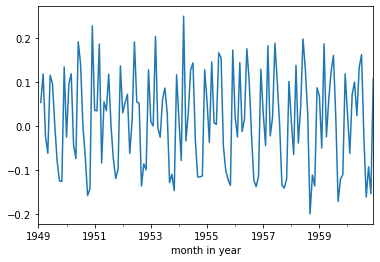

In [35]:
df['pct'].plot()

#### Seasonality

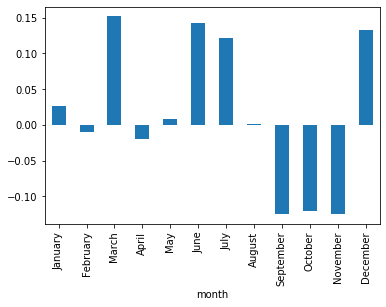

In [40]:
# monthly means
mm = df.groupby('month')['pct'].mean()
mm.plot.bar()

In [78]:
# we need a Series that is as long as our df
df.shape

(144, 8)

In [80]:
df.head(20)

,year,month,passengers,diff,pct,month_means,detrend_sub,detrend_div
month in year,,,,,,,,
1949-01-01,1949,January,112,NaN,NaN,0.025745,NaN,NaN
1949-02-01,1949,February,118,6.0,0.053571,-0.010453,0.064024,-5.125151
1949-03-01,1949,March,132,14.0,0.118644,0.151735,-0.033091,0.781915
1949-04-01,1949,April,129,-3.0,-0.022727,-0.020056,-0.002671,1.133193
1949-05-01,1949,May,121,-8.0,-0.062016,0.008571,-0.070587,-7.235117
1949-06-01,1949,June,135,14.0,0.115702,0.142526,-0.026824,0.811798
1949-07-01,1949,July,148,13.0,0.096296,0.121226,-0.024930,0.794351
1949-08-01,1949,August,148,0.0,0.000000,0.001147,-0.001147,0.000000
1949-09-01,1949,September,136,-12.0,-0.081081,-0.125067,0.043986,0.648301


In [42]:
mm.shape

(12,)

In [45]:
df['month_means'] = list(mm) * 12

In [51]:
df['detrend_div'] = df['pct'] / df['month_means']

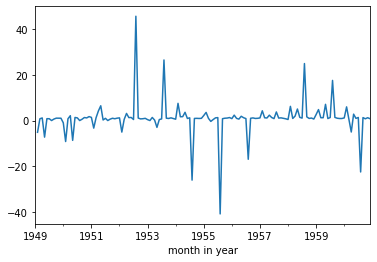

In [62]:
df['detrend_div'].plot() # identifies outliers

In [54]:
df['detrend_div'].mean()

0.9999999999999998

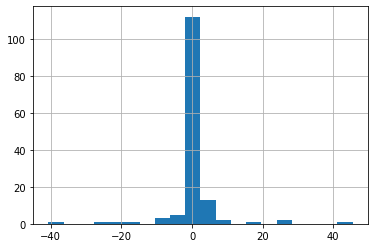

In [58]:
df['detrend_div'].hist(bins=20)#

In [59]:
df['detrend_sub'] = df['pct'] - df['month_means']

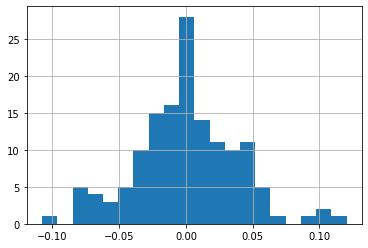

In [61]:
df['detrend_sub'].hist(bins=20) # subtraction is more robust

#### Other
- logarithms
- Box-Cox-Transform

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

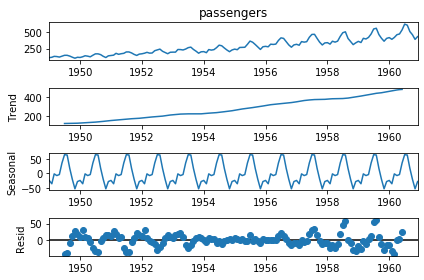

In [76]:
# additive == diff
x = seasonal_decompose(df['passengers'])
plot = x.plot() # plot= because it prints plot twice otherwise

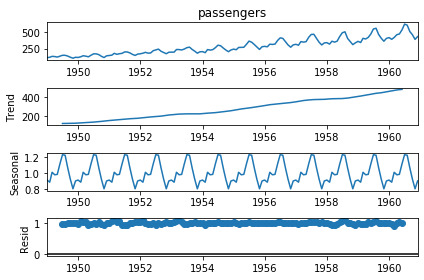

In [77]:
# multiplicative == diff
x2 = seasonal_decompose(df['passengers'], model='multiplicative')
plot2 = x2.plot()